# Titanic Biclass AlexB

### Data understanding and intro

Import the different librairies i'll use in the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as Kne

Read csv and asign it a variable df.

In [2]:
df = pd.read_csv("/Users/alexandrebredillot/Documents/GitHub/EXP/BICLASS - Titanic/Titanic-Dataset.csv")

Lets #1 get a better understanding of the data and the problem we can works toward solving.

In [3]:
pd.set_option('display.max_columns', None)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


The goal depicted by many works related to this dataset is to predict wether or not a passenger of Titanic survived based on the different profiles and the data provided. This is a binary classification problem and we will in this notebook delve into it.
The columns names are pretty consice and explicit (except for parch "parents and children present on board" and sibsp "siblings or spouse on board"), i won't change any.


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


The set is quite short, 891-entries but is enough for a pretty accurate prediction.


## Pipeline

### Data preparation

Now, I will start the pipeline of our models and predictions by cleaning the data and standardizing it.
Based on the different columns we can assume that certain features -such as the name, the ticket number and cabin number aren't relevant enough to be included in our scope.

In [5]:
df = df.drop(columns = ["Name", "Ticket", "Cabin"])

Lets now try and standardize columns for wich we have Nan values.

In [6]:
null_cols = df.columns[df.isnull().any()]

print(df[null_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Embarked  889 non-null    object 
dtypes: float64(1), object(1)
memory usage: 14.1+ KB
None


<function matplotlib.pyplot.show(close=None, block=None)>

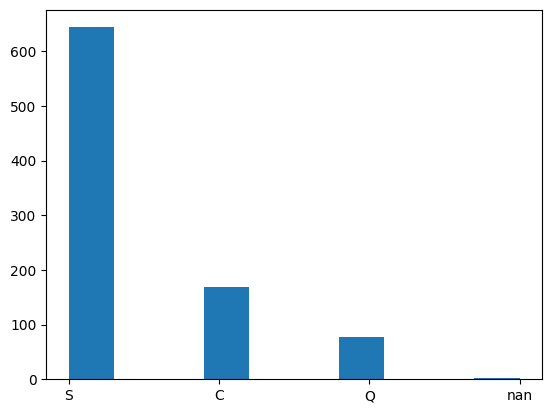

In [ ]:
df["Embarked"] = df["Embarked"].astype(str)
plt.hist(df["Embarked"])
plt.show